In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans


In [4]:
cd=pd.read_csv("crime_data.csv")
cd.head(20)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [6]:
df_norm=norm_func(cd.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [61]:
df_norm.head(10)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [14]:
import warnings
warnings.filterwarnings("ignore")

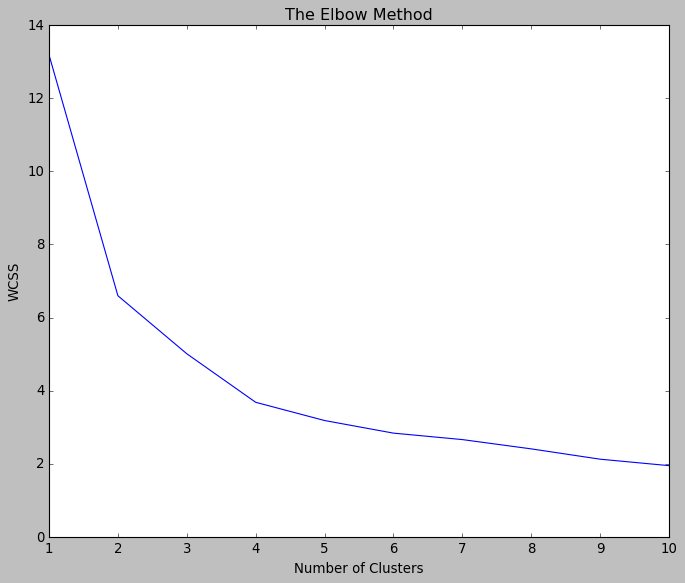

In [62]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show() 




In [47]:
clf=KMeans(n_clusters=5)
y_KMeans=clf.fit_predict(df_norm)

In [48]:
y_KMeans
clf.labels_

array([2, 1, 1, 0, 1, 1, 4, 4, 1, 2, 4, 3, 1, 0, 3, 0, 0, 2, 3, 1, 4, 1,
       3, 2, 0, 0, 0, 1, 3, 4, 1, 1, 2, 3, 0, 0, 0, 0, 4, 2, 3, 2, 1, 4,
       3, 0, 4, 3, 3, 0])

In [49]:
y_KMeans

array([2, 1, 1, 0, 1, 1, 4, 4, 1, 2, 4, 3, 1, 0, 3, 0, 0, 2, 3, 1, 4, 1,
       3, 2, 0, 0, 0, 1, 3, 4, 1, 1, 2, 3, 0, 0, 0, 0, 4, 2, 3, 2, 1, 4,
       3, 0, 4, 3, 3, 0])

In [50]:
clf.cluster_centers_

array([[0.37534754, 0.31190727, 0.53063885, 0.32379249],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.11325301, 0.0859589 , 0.3220339 , 0.09328165],
       [0.22966867, 0.33433219, 0.82627119, 0.2622739 ]])

In [51]:
clf.inertia_

3.2124148218506012

In [52]:
md=pd.Series(y_KMeans)
cd['clust']=md
cd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,4
7,Delaware,5.9,238,72,15.8,4
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


In [53]:
cd.iloc[:,1:].groupby(cd.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,7.030769,136.076923,63.307692,19.830769,0.0
1,10.966667,264.000000,76.500000,33.608333,1.0
2,14.671429,251.285714,54.285714,21.685714,2.0
3,2.680000,70.100000,51.000000,10.910000,3.0
4,4.612500,142.625000,80.750000,17.450000,4.0


In [56]:
data=cd[cd.clust==0]
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
24,Missouri,9.0,178,70,28.2,0
25,Montana,6.0,109,53,16.4,0
26,Nebraska,4.3,102,62,16.5,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [57]:
data=cd[cd.clust==2]
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,2
9,Georgia,17.4,211,60,25.8,2
17,Louisiana,15.4,249,66,22.2,2
23,Mississippi,16.1,259,44,17.1,2
32,North Carolina,13.0,337,45,16.1,2
39,South Carolina,14.4,279,48,22.5,2
41,Tennessee,13.2,188,59,26.9,2


In [63]:
data=cd[cd.clust==3]
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
18,Maine,2.1,83,51,7.8,3
22,Minnesota,2.7,72,66,14.9,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3
44,Vermont,2.2,48,32,11.2,3
47,West Virginia,5.7,81,39,9.3,3
48,Wisconsin,2.6,53,66,10.8,3


In [64]:
plt.style.use(['classic'])
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Cluester using Kmeans')

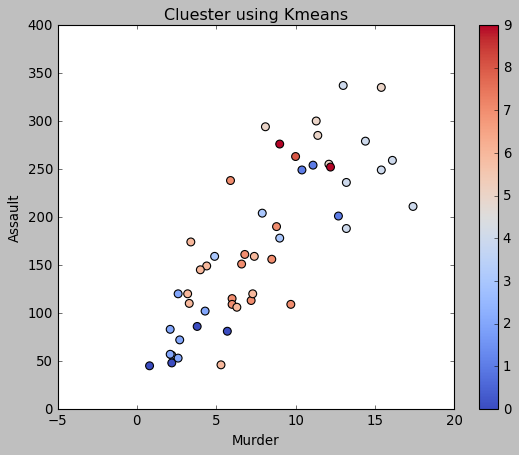

In [65]:
cd.plot(x="Murder",y="Assault",c=clf.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm)
plt.title("Cluester using Kmeans")


In [66]:
WCSS

[13.184122550256443,
 6.596893867946198,
 5.010878493006418,
 3.6834561535859143,
 3.185021932472434,
 2.8403508357011535,
 2.663682218481698,
 2.4097770449389686,
 2.127642031485487,
 1.9511854664960173]